# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [43]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [45]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [46]:
# Rename all the columns to lower case
df.columns = [col.lower() for col in df.columns]

In [47]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [48]:
# Change the index to 'linename'
df.set_index('linename',inplace=True)

Reset the index: 

In [49]:
# Reset the index
df.reset_index(inplace=True)

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [50]:
# Add a new 'num_lines' column
station_counts = df['station'].value_counts().to_dict()
df['Num_Lines'] = df['station'].map(station_counts)
df_sorted = df.sort_values(by = 'Num_Lines',ascending=False)

Write a function to clean column names: 

In [51]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [52]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip().lower()
    return cleaned

In [53]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]

In [54]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [55]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])
# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()
df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,2229,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,2229,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,2229,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,2229,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,2229,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,05:00:00,REGULAR,5554,348,252,Friday
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,09:00:00,REGULAR,5554,348,252,Friday
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,13:00:00,REGULAR,5554,348,252,Friday
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,17:00:00,REGULAR,5554,348,252,Friday


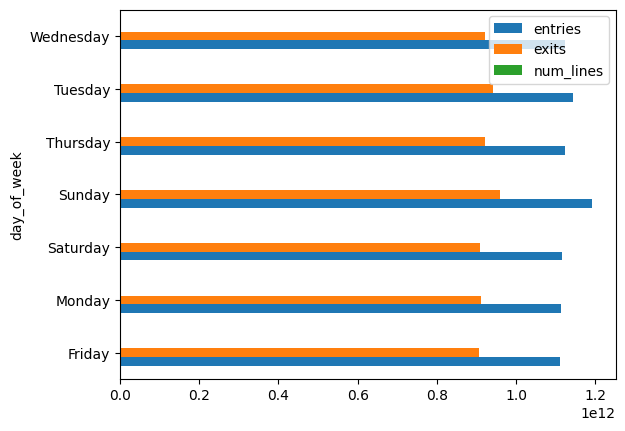

In [56]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [57]:
# Reset the index of grouped
grouped.reset_index(inplace=True)

# Print the first five rows of grouped
print(grouped.head(5))

  day_of_week        entries         exits  num_lines
0      Friday  1110224700078  906799065337   29962515
1      Monday  1114237052454  911938153513   29871580
2    Saturday  1115661545514  909142081474   29446349
3      Sunday  1192306179082  959223750461   29685694
4    Thursday  1122723988662  920691927110   30220251


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [59]:
# Use this dictionary to create a new column 
weekend_map = {'Sunday':False, 'Monday':False, 'Tuesday':False, 'Wednesday':False, 'Thursday':False, 'Friday':True, 'Saturday':True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
grouped

,day_of_week,entries,exits,num_lines,is_weekend
0,Friday,1110224700078,906799065337,29962515,True
1,Monday,1114237052454,911938153513,29871580,False
2,Saturday,1115661545514,909142081474,29446349,True
3,Sunday,1192306179082,959223750461,29685694,False
4,Thursday,1122723988662,920691927110,30220251,False
5,Tuesday,1143313287046,942230721477,30502211,False
6,Wednesday,1123655222441,920630864687,29916721,False


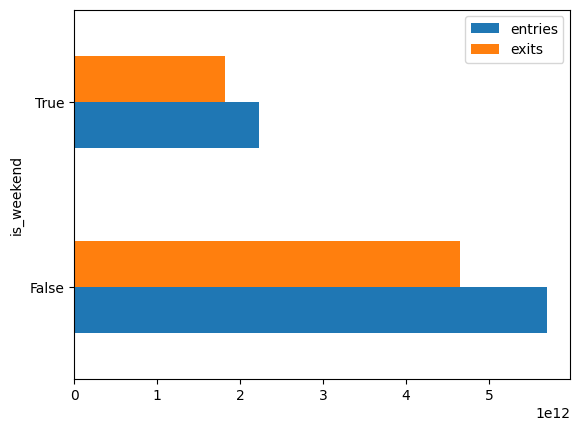

,entries,exits,num_lines
is_weekend,,,
False,5696235729685,4654715417248,150196457
True,2225886245592,1815941146811,59408864


In [61]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [62]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a','scp'],axis=1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,2229,Saturday
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,2229,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
'''
the key in weekend_map is not matching day_of_week in grouped .
'''

## Summary

You practiced your data cleanup skills using Pandas.